In [24]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import controller 

In [25]:
ctrl = controller.controller()

In [26]:
Q = np.array(
    [
        [1., 0.],
        [0., 1.]
    ]
)
F = np.array([
    [1.,0.],
    [0.,1.]
])
R = 0.1

ctrl.set_cost(Q,R,F)

In [27]:
CL = 2
def matrix_iterator(x0,u0):
    A = np.array(
    [
        [0. , 0.1],
        [0. , 1.]
    ]
    )
    B = np.array(
        [
            [0.],
            [0.5]
        ]
    )

    f0 = A@x0 + B@u0

    return A,B,f0

x0 = np.array([[20.,-20.]]).reshape(-1,1)

xd = np.array(
    [
        [0],
        [0.]
    ]
)

u0 = np.array(
    [
        [0]
    ]
)


In [28]:
ctrl.pred_horizon = 10
xlist = [x0]
ulist = [u0]
for i in range(300):
    A,B,f0 = matrix_iterator(x0,u0)
    ctrl.update_dynamics(A,B,f0)
    ctrl.discretize(1.0)
    ctrl.setup_qp_linear(x0,u0,xd)
    u = ctrl.solve_qp(x0)
    u0 = u[0:1].reshape(-1,1)
    x0 = ctrl.apply_control(x0,u0)
    xlist.append(x0)
    ulist.append(u0)
    #print('stepped')


In [29]:
import matplotlib.pyplot as plt

In [30]:
xm = np.array(xlist).squeeze(-1)
print(xm.shape)

(301, 2)


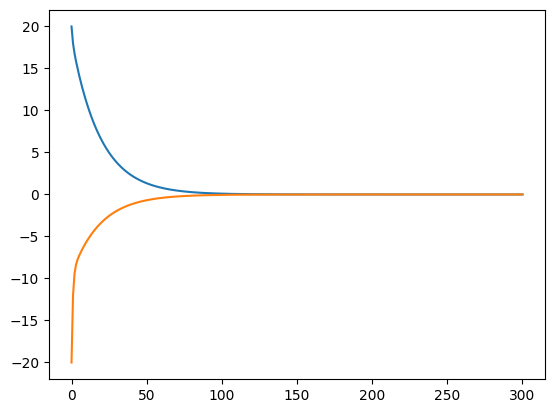

In [31]:
plt.plot(xm[:,0])
plt.plot(xm[:,1])

In [32]:
u_tilde = u.reshape(-1,2)

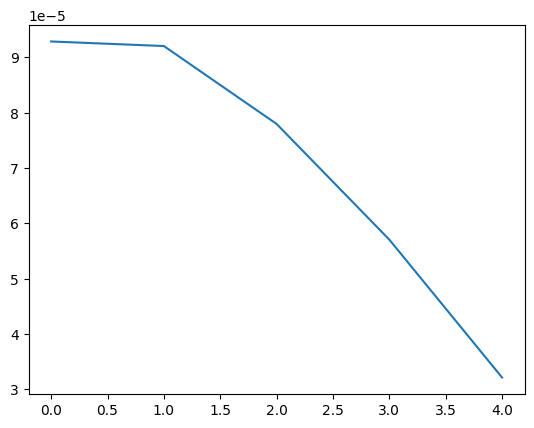

In [33]:
plt.plot(u_tilde[:,0])

In [34]:
u_tilde[6,0]

IndexError: index 6 is out of bounds for axis 0 with size 5